In [1]:
''' Program Description : Covid19 Endemic details of each country and continent in the world from a couple of public  APIs'''

' Program Description : Covid19 Endemic details of each country and continent in the world from a couple of public  APIs'

In [2]:
# API 1 : Rapid API, URL https://covid-193.p.rapidapi.com/statistics

In [ ]:
# Import Libraies 
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import date
import sqlite3
from tabulate import tabulate
from pandas.io import sql

In [ ]:
# Accessing Rapid API - COVID-19 data 
url = "https://covid-193.p.rapidapi.com/statistics"                       

querystring = {"country":"india"}                 # query string : select other country

headers = {
	"X-RapidAPI-Key": "1892c8507amsh394ab3093c2eab2p1fc9a8jsn57e51c27368a",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data=response.json()
data                                              #data is in dictionary form

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')              #dataframe from dictionary 
df = df.transpose()
df

In [ ]:
# information is accessable country by country. To get larger data usable for datascience project, let us try next API location

In [4]:
''' 
API location : https://covid-api.com/api/  '''

' \nAPI location : https://covid-api.com/api/  '

In [5]:
                                                               # Function to get json data from Public API
def get_covid_data(API_url, endpoint):
    # Function to get JSON data from a Public API
    url = API_url + endpoint

    try:
        response = requests.get(url)
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

In [6]:
def create_data_from_covid_data(data):                         # Function to get single column data dictionary
    if data is not None:
        df = pd.DataFrame(data)                                
        return df
    else:
        return None

In [7]:
def create_dataframe(df):                                     # converts to multi column dataframe
        dataframe = df['data'].apply(pd.Series) 
        return dataframe


In [8]:
def API():
    API_url = 'https://covid-api.com/api/'                     #no key access - anyone can use
    endpoint='reports'
    
    data = get_covid_data(API_url,endpoint)                  #calling get covid data function

    df = create_data_from_covid_data(data)                   #calling create data from covid data function
      
    dataframeRep = create_dataframe(df)                       #calling create dataframe function        
   
    return dataframeRep


In [9]:
dataframeReports = API()    # we will only use dataframeReports in our analysis FOR DATA PROCESSING 

In [10]:
''' Data Preprocessing of ‘dataframeReports’:
- Generate the summary on missing values 
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers. 
''' 

' Data Preprocessing of ‘dataframeReports’:\n- Generate the summary on missing values \n- Document any inconsistencies and potential outliers\n- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers. \n'

In [11]:
dataframeReports.head(5)                                             # first dataframe 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,"{'iso': 'AFG', 'name': 'Afghanistan', 'provinc..."
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,"{'iso': 'ALB', 'name': 'Albania', 'province': ..."
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,"{'iso': 'DZA', 'name': 'Algeria', 'province': ..."
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,"{'iso': 'AND', 'name': 'Andorra', 'province': ..."
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,"{'iso': 'AGO', 'name': 'Angola', 'province': '..."


In [12]:
dataframeReports.tail(5) 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
786,2023-03-09,11526994,43186,0,0,0,0,2023-03-10 04:21:03,11483808,0,0.0037,"{'iso': 'VNM', 'name': 'Vietnam', 'province': ..."
787,2023-03-09,703228,5708,0,0,0,0,2023-03-10 04:21:03,697520,0,0.0081,"{'iso': 'PSE', 'name': 'West Bank and Gaza', '..."
788,2023-03-09,11945,2159,0,0,0,0,2023-03-10 04:21:03,9786,0,0.1807,"{'iso': 'YEM', 'name': 'Yemen', 'province': ''..."
789,2023-03-09,343135,4057,0,0,0,0,2023-03-10 04:21:03,339078,0,0.0118,"{'iso': 'ZMB', 'name': 'Zambia', 'province': '..."
790,2023-03-09,264276,5671,0,0,0,0,2023-03-10 04:21:03,258605,0,0.0215,"{'iso': 'ZWE', 'name': 'Zimbabwe', 'province':..."


In [13]:
dataframeReports.shape

(791, 12)

In [14]:
dataframeReports.dtypes

date               object
confirmed           int64
deaths              int64
recovered           int64
confirmed_diff      int64
deaths_diff         int64
recovered_diff      int64
last_update        object
active              int64
active_diff         int64
fatality_rate     float64
region             object
dtype: object

In [15]:
dataframeReports.describe()

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
count,7.910000e+02,791.000000,791.0,791.000000,791.000000,791.0,7.910000e+02,791.000000,791.000000
mean,8.553031e+05,8700.046776,0.0,245.386852,2.343869,0.0,8.466031e+05,243.042984,0.015246
std,2.397051e+06,19993.091547,0.0,1412.119417,18.059342,0.0,2.382865e+06,1396.168046,0.025190
min,0.000000e+00,0.000000,0.0,0.000000,-1.000000,0.0,-3.380000e+02,-13.000000,0.000000
25%,6.179550e+04,534.500000,0.0,0.000000,0.000000,0.0,5.898450e+04,0.000000,0.004300
50%,2.111580e+05,2548.000000,0.0,0.000000,0.000000,0.0,2.075050e+05,0.000000,0.010300
75%,6.732080e+05,8297.000000,0.0,89.000000,0.000000,0.0,6.673000e+05,88.500000,0.019100
max,3.861851e+07,186138.000000,0.0,26285.000000,431.000000,0.0,3.845700e+07,25854.000000,0.533600


In [16]:
# Data Preprocessing: Count of Missing Values & Percentage of Missing Values (in numeric columns)
                          

In [ ]:
column_names = ['confirmed', 'deaths', 'recovered', 'confirmed_diff', 'deaths_diff', 'recovered_diff', 'active', 'active_diff']

data = []
for column in column_names:
    missing_count = (dataframeReports[column] == 0).sum()
    missing_percentage = (missing_count / len(dataframeReports)) * 100
    data.append([column, missing_count, missing_percentage])

table_headers = ["Column Name", "Null Values", "Missing Percentage"]
table = tabulate(data, headers=table_headers, tablefmt='grid')

print(f'Total number of rows: {len(dataframeReports)}\n')
print(table)

In [ ]:
# outliers : column 'region' is filled with dictionaries as shown below

In [ ]:
data=dataframeReports['region']                                      
data

In [ ]:
# Code to covert the column 'region' contents to another dataframe

In [ ]:
dataframeLocation=data.apply(pd.Series)                                #location dataframe
dataframeLocation

In [ ]:
''' Data Preprocessing of ‘dataframeLocation’:
- Generate the summary of missing values 
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers. 
''' 

In [ ]:
dataframeLocation.info()

In [ ]:
dataframeLocation.dtypes

In [ ]:
dataframeLocation.value_counts 

In [ ]:
dataframeLocation.describe()

In [ ]:
dataframeLocation['cities'].values 

In [ ]:
'''There exists some dictionary/empty lists in 'cities' column. Which can be made into another dataframe. 
But for simplicity of this project i dont wish to consider another dataframe. 
so i drop the cities column from the dataframeLocation'''

In [ ]:
dataframeLocation.drop(['cities'], axis='columns', inplace=True)

In [ ]:
dataframeLocation['province'].values 

In [ ]:
dataframeLocation.drop(['province'], axis='columns', inplace=True)

In [ ]:
''' Data preprocessing to handle inconsistencies: 
  - In general, the data frames need one unique/primary identifier (key)for SQL requirements
  -for dataframeLocation, let us make ‘iso’ column, as a primary key. 
   -for dataframeReports, let us add ‘iso’ column so that both can have the same primary keys for simplicity.
   -I dropped ‘region’ in dataframeReports, which is clustered (note: we already used it to make dataframeLocation). 
   So two dataframes are considered for analysis.  see the following steps for details
''' 

In [ ]:
# adding 'ISO' of dataframeLocation to  dataframeReports 
dataframeReports['iso'] = dataframeLocation['iso']
print(dataframeReports)



In [ ]:
# let us drop the column 'region' as we SUBSTITUTED IT WITH 'iso' COLUMN 
del dataframeReports['region']
dataframeReports

In [ ]:
#note:  'date stamp and time stamp' are ensured for 2 columns.

In [ ]:
dataframeReports['date'] = '2023-03-09 00:00:00'
dataframeReports['date'] = pd.to_datetime(dataframeReports['date'])
dataframeReports['last_update'] = pd.to_datetime(dataframeReports['last_update'])

In [2]:
#Plots / maps to further investigate dataframes

In [ ]:
import matplotlib.pyplot as plt

# 'dataframeReportsLocation'
filtered_data = dataframeReports[dataframeReports['deaths'] > 100000]

plt.bar(filtered_data['iso'], filtered_data['deaths'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location iso tags')
plt.ylabel('Number of Deaths')
plt.title('Locations with Deaths > 100,000')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#pair plot investigation of dataframeReports

sns.pairplot(dataframeReports)
plt.suptitle('Pair Plot')
plt.show()

In [5]:
# there are many plots with zeros (horizontal or vertical lines). some are concentrated closer to the origins

In [ ]:
# scatter plot 
np.random.seed(123)
dataframeReportssample = dataframeReports.sample(30)

plt.scatter(dataframeReportssample['fatality_rate'],dataframeReportssample['iso'])

plt.xlabel('fatality_rate')
plt.ylabel('iso (country code)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Axes: >

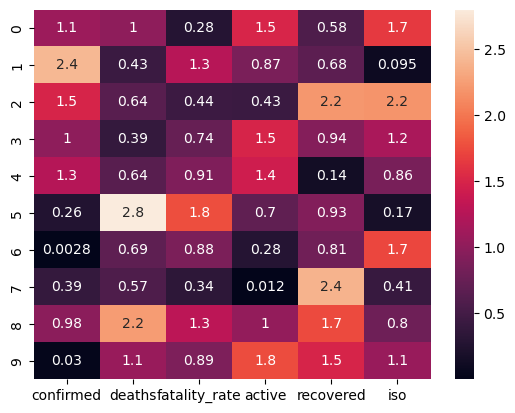

In [7]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

sample_size =10
Rows_number= ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

Cols = ['confirmed','deaths', 'fatality_rate', 'active','recovered', 'iso']
Cols_number=len(Cols)

df = DataFrame(abs(np.random.randn(sample_size, Cols_number)), index=Rows_number, columns=Cols)




sns.heatmap(df, annot=True)


In [ ]:
import seaborn as sb
corr = dataframeReports.corr()
sb.heatmap(corr, annot=True)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
dataframeReportssample = dataframeReports.tail(100)
dataframeLocationsample = dataframeLocation.tail(100)

# Creating a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for 'dataframeReportssample'
axes[0].scatter(dataframeReportssample['fatality_rate'], dataframeReportssample['iso'])
axes[0].set_xlabel('deaths')
axes[0].set_ylabel('iso')
axes[0].set_title('Scatter Plot for dataframeReportssample')

# Subplot for 'dataframeLocationsample'
axes[1].scatter(dataframeLocationsample['name'], dataframeLocationsample['iso'])
axes[1].set_xlabel('Country names')
plt.xticks(rotation=90)
axes[1].set_ylabel('iso (country code)')
axes[1].set_title('Scatter Plot for dataframeLocationsample')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()





In [9]:
# let us further investigate dataframeReports using profiling (we dont investigate dataframeLocation as actual data of covid-19 is inside dataframeReports)

In [10]:
'''
as my jupyter notbook is unable to install profiling or sweetviz packages,
i will transfer dataframeReports to csv file and store in GITHUB,
which can be used in colab to do profiling of the dataframe
''' 

'\nas my jupyter notbook is unable to install profiling or sweetviz packages,\ni will transfer dataframeReports to csv file and store in GITHUB,\nwhich can be used in colab to do profiling of the dataframe\n'

In [ ]:
#create a csv file
dataframeReports.to_csv('forprofilingpurposecorrected.csv', sep=',', index=False, encoding='utf-8')


In [12]:
''' colab link to find information on dataframeReports
https://github.com/venuannamdas/mini_proj/blob/master/DataAnlytics_profiling_dtaframeReports.ipynb
''' 

' colab link to find information on dataframeReports\nhttps://github.com/venuannamdas/mini_proj/blob/master/DataAnlytics_profiling_dtaframeReports.ipynb\n'

In [13]:
''' SQL Database Integration:
   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.
   '''

' SQL Database Integration:\n   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.\n   '

In [14]:
# date	confirmed	deaths	recovered	confirmed_diff	deaths_diff	recovered_diff	last_update	active	active_diff	fatality_rate	iso

In [15]:
##column_names = ['iso', 'name', 'lat', 'long']  of dataframeLocation

In [16]:
connection =sqlite3.connect("SQLfolder\DataAnalytics2023.db")

In [17]:
cursor = connection.cursor()

In [ ]:
#dataframeReports  to sql table 
dataframeReports.to_sql('covid_reports', connection, if_exists='replace', index = False)

In [19]:
query = 'Select  DISTINCT date, iso, max(deaths) FROM covid_reports'
cursor.execute(query)
cursor.fetchall()

[('2023-03-09 00:00:00', 'GBR', 186138)]

In [20]:
query1 = "SELECT DISTINCT iso, fatality_rate FROM covid_reports ORDER BY deaths DESC LIMIT 10"

cursor.execute(query1)
result1 = cursor.fetchall()

print("Higher fatality rate need not always have higher deaths, as proved below:")
print(f"From deaths between 10000 AND 20000 occurred {len(result1)} times")
print("iso, fatality_rate")
for row in result1:
    iso, fatality_rate = row
    print(f"{iso}, {fatality_rate}")

Higher fatality rate need not always have higher deaths, as proved below:
From deaths between 10000 AND 20000 occurred 10 times
iso, fatality_rate
GBR, 0.009
BRA, 0.0277
IDN, 0.0239
IND, 0.0182
IRN, 0.0191
ARG, 0.013
POL, 0.0185
ZAF, 0.0252
TUR, 0.006
USA, 0.0083


In [21]:
query = 'Select  COUNT(deaths), iso FROM covid_reports WHERE iso=="IND" AND deaths BETWEEN 10000 AND 20000'
cursor.execute(query)
cursor.fetchall()

[(7, 'IND')]

In [22]:
query1 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'CHN' AND deaths BETWEEN 2500 AND 5000;
'''

query2 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'CHN' AND deaths BETWEEN 500 AND 2500;
'''

query3 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'CHN' AND deaths BETWEEN 100 AND 500;
'''
cursor.execute(query1)
result1 = cursor.fetchall()

cursor.execute(query2)
result2 = cursor.fetchall()

cursor.execute(query3)
result3 = cursor.fetchall()

# Now you have the results for both queries in result1 and result2
print(f"In china, deaths between 2500 AND 5000 occured {result1} times")
print(f"          deaths between 500 AND 2500 occured {result2} times")
print(f"          deaths between 100 AND 500 occured {result3} times")


In china, deaths between 2500 AND 5000 occured [(1,)] times
          deaths between 500 AND 2500 occured [(1,)] times
          deaths between 100 AND 500 occured [(1,)] times


In [ ]:
#dataframeLocation  to sql table 
dataframeLocation.to_sql('covid_location', connection, if_exists='replace', index = False)

In [24]:
query = 'Select  covid_reports.deaths, covid_location.name, covid_location.iso, covid_location.lat, covid_location.long FROM covid_reports join covid_location ON covid_reports.iso=covid_location.iso LIMIT 10'
cursor.execute(query)
cursor.fetchall()

[(7896, 'Afghanistan', 'AFG', '33.9391', '67.7100'),
 (3598, 'Albania', 'ALB', '41.1533', '20.1683'),
 (6881, 'Algeria', 'DZA', '28.0339', '1.6596'),
 (165, 'Andorra', 'AND', '42.5063', '1.5218'),
 (1933, 'Angola', 'AGO', '-11.2027', '17.8739'),
 (146, 'Antigua and Barbuda', 'ATG', '17.0608', '-61.7964'),
 (130472, 'Argentina', 'ARG', '-38.4161', '-63.6167'),
 (8727, 'Armenia', 'ARM', '40.0691', '45.0382'),
 (228, 'Australia', 'AUS', '-12.4634', '130.8456'),
 (228, 'Australia', 'AUS', '-28.0167', '153.4000')]

In [44]:
query = 'SELECT  covid_location.name, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso ORDER BY covid_location.name DESC'
cursor.execute(query)
cursor.fetchall()

[('Zimbabwe', 5671, '-19.0154', '29.1549'),
 ('Zambia', 4057, '-13.1339', '27.8493'),
 ('Yemen', 2159, '15.552726999999999', '48.516388'),
 ('West Bank and Gaza', 5708, '31.9522', '35.2332'),
 ('Vietnam', 43186, '14.0583', '108.2772'),
 ('Venezuela', 5854, '6.4238', '-66.5897'),
 ('Vanuatu', 14, '-15.3767', '166.9592'),
 ('Uzbekistan', 1637, '41.3775', '64.5853'),
 ('Uruguay', 7617, '-32.5228', '-55.7658'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 8, '18.2206', '-63.0686'),
 ('United Kingdom', 12, '18.2206', '-63.0686'),
 ('United Kingdom', 37, '18.2206', '-63.0686'),
 ('United Kingdom', 38, '18.2206', '-63.0686'),
 ('United Kingdom', 64, '18.2206', '-63.0686'),
 ('United Kingdom', 66, '18.2206', '-63.0686'),
 ('United Kingdom', 111, '18.2206', '-63.0686'),
 ('United Kingdom', 116, '18.2206', '-63.0686'),
 ('United Kingdo

In [26]:
query = 'SELECT  covid_location.name AS COUNTRY_NAME, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso limit 1'
cursor.execute(query)
cursor.fetchall()

[('Afghanistan', 7896, '33.9391', '67.7100')]

In [27]:
# BELOW IS THE CODE FOR LOCATING ANY COUNTRY/countries USING LATITUDE AND LONGITUDE. 

In [75]:
# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS country_name,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 791"
cursor.execute(query)

# Fetch rows UPTO 50
ROWS=50 #CAN BE CHANGED BASED ON YOUR CHOICE 
rows = cursor.fetchmany(ROWS)

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"A city in the Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


In [77]:
import pandas as pd
import folium

# Assuming you have established a database connection and have a cursor object named 'cursor'

# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS COUNTRY_NAME,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 100"
cursor.execute(query)

rows = cursor.fetchall()

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


In [63]:

# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS COUNTRY_NAME,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 50"
cursor.execute(query)

# Fetch all rows from the result set
rows = cursor.fetchall()

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


In [ ]:
# Close the database connection when done
connection.close()